In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
datos = pd.read_csv('dt_titanic.csv')

In [5]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

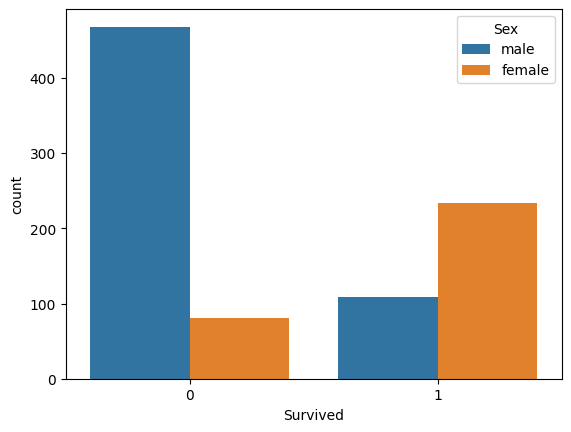

In [8]:
sns.countplot(x='Survived', data=datos, hue='Sex')

In [10]:
datos.shape

(891, 12)

In [9]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

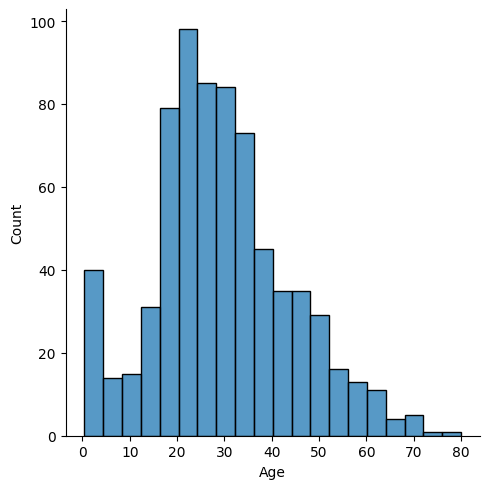

In [11]:
sns.displot(x='Age', data=datos)

In [12]:
datos['Age'].mean()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
datos['Age'] = datos['Age'].fillna(datos['Age'].mean())
datos['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [20]:
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
datos = datos.drop(['Cabin'], axis=1)

In [18]:
datos['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
datos = datos.dropna()

In [21]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
datos = datos.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [23]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
dumies_sex = pd.get_dummies(datos['Sex'], drop_first=True)

In [ ]:
datos = datos.join(dumies_sex)

In [31]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [32]:
datos['sexEncoded'] = datos['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [33]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,sexEncoded
0,0,3,male,22.0,1,0,7.2500,S,True,1
1,1,1,female,38.0,1,0,71.2833,C,False,0
2,1,3,female,26.0,0,0,7.9250,S,False,0
3,1,1,female,35.0,1,0,53.1000,S,False,0
4,0,3,male,35.0,0,0,8.0500,S,True,1


In [35]:
datos = datos.drop(['Sex', 'male'], axis=1)
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,sexEncoded
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

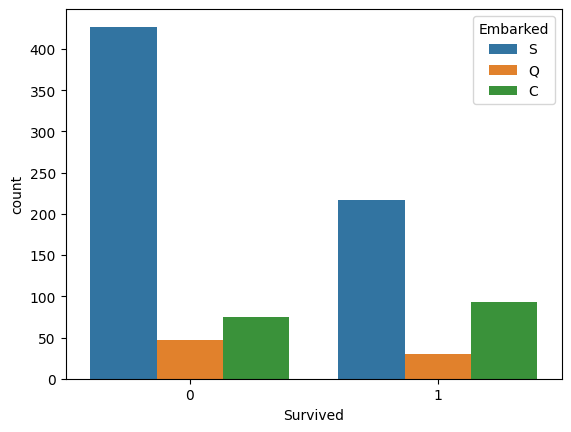

In [36]:
sns.countplot(x='Survived', data=datos, hue='Embarked')

In [37]:
dumies_embk = pd.get_dummies(datos['Embarked'], drop_first=True)

In [38]:
datos = datos.join(dumies_embk)

In [41]:
datos = datos.drop(['Embarked'], axis=1)

In [42]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sexEncoded,Q,S
0,0,3,22.0,1,0,7.2500,1,False,True
1,1,1,38.0,1,0,71.2833,0,False,False
2,1,3,26.0,0,0,7.9250,0,False,True
3,1,1,35.0,1,0,53.1000,0,False,True
4,0,3,35.0,0,0,8.0500,1,False,True


<Axes: >

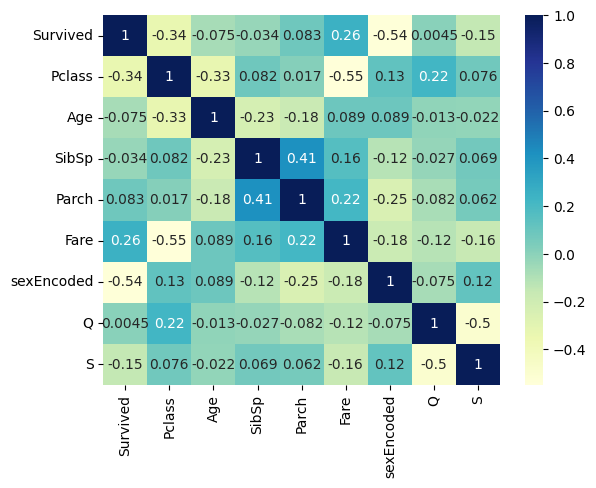

In [43]:
sns.heatmap(datos.corr(), annot=True, cmap= 'YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

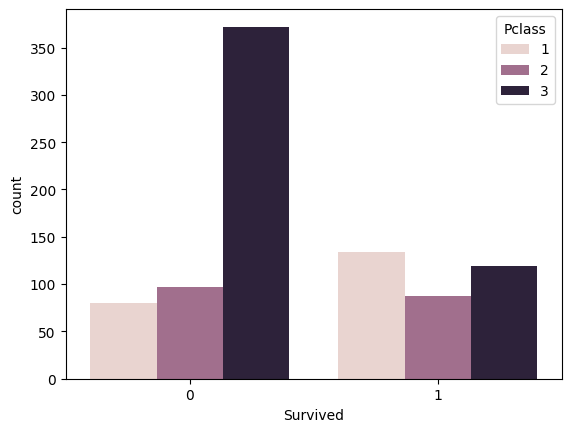

In [44]:
sns.countplot(x='Survived', data=datos, hue='Pclass')

In [45]:
X = datos.drop(['Survived'], axis=1)
y = datos['Survived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
pred = modelo.predict(X_test)

In [52]:
accuracy_score(y_test, pred)

0.8052434456928839

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       161
           1       0.77      0.73      0.75       106

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [57]:
confusion_matrix(y_test, pred)

array([[138,  23],
       [ 29,  77]], dtype=int64)

In [58]:
pd.DataFrame(confusion_matrix(y_test, pred), columns=['Pred: No', 'Pred: Si'], index=['Real: No', 'Real: Si'])

,Pred: No,Pred: Si
Real: No,138,23
Real: Si,29,77


In [59]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,sexEncoded,Q,S
0,3,22.0,1,0,7.2500,1,False,True
1,1,38.0,1,0,71.2833,0,False,False
2,3,26.0,0,0,7.9250,0,False,True
3,1,35.0,1,0,53.1000,0,False,True
4,3,35.0,0,0,8.0500,1,False,True


In [64]:
nueva_persona = [1, 23, 1, 0, 80, 1, 0, 0]
predi = modelo.predict([nueva_persona])

if predi[0] == 1:
    print('Sobreviviste')
else:
    print('No sobreviviste')

Sobreviviste


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
